## データビリティコンソーシアム eラーニング講座：AIを体系的に学ぶ
## 知識情報学（第3回）識別(2) ロジスティック回帰
- MIT Lisence

## 演習：ロジスティック回帰による手書き文字認識

In [8]:
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
import warnings
warnings.simplefilter('ignore')

### MNISTデータの読み込み
- 0〜9の数字の手書き文字（画像）
- 各画像は28x28ピクセル，0〜255の輝度値からなる
- 70,000点のデータセット

In [2]:
# 公開データセットのサイトopenmlからMNISTデータをダウンロード(少々時間が掛かります)
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)

In [3]:
X, y = mnist["data"], mnist["target"]
# データ数，次元数(28x28=784)を確認
X.shape

(70000, 784)

### 最初のサンプル画像を表示

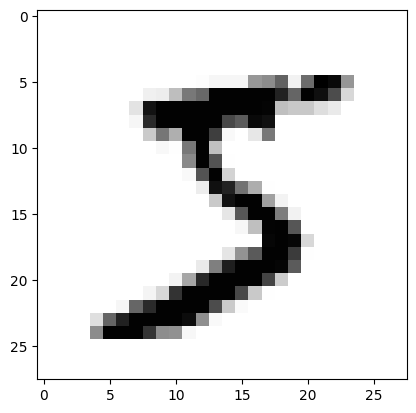

In [4]:
# 784 -> 28x28の2次元に変換
img = X[0].reshape(28,28)
# imshowで画像を表示
plt.imshow(img, cmap="Greys")
plt.show()

In [5]:
# 学習用に最初の1000点，テスト用に最初の1000点のデータを使用
X_train = X[:1000][:]
y_train = y[:1000][:]
X_test = X[1000:2000][:]
y_test = y[1000:2000][:]
print('#data: %d, #feature: %d (training data)' % (X_train.shape[0], X_train.shape[1]))
print('#data: %d, #feature: %d (test data)' % (X_test.shape[0], X_test.shape[1]))

#data: 1000, #feature: 784 (training data)
#data: 1000, #feature: 784 (test data)


### 【オンライン演習1】 ロジスティック回帰の学習と学習データおよびテストデータに対するAccuracyの算出
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- 3クラス以上のマルチクラスへの対応は、multi_classで指定する。ovr(one-versus-rest)法は、1対多でクラス数分の識別器を構築し、テストデータのクラス分類は最も確率の高いクラスへ分類する方式。solverはliblinearを指定することに注意。

In [9]:
# ロジスティック回帰のインスタンス生成
lr = LogisticRegression(penalty='l2', C=1000.0, solver='liblinear', multi_class='ovr')
# 学習データに適合
lr.fit(X_train, y_train)
# Accuracyの算出
acc_trn = lr.score(X_train, y_train)
acc_tst = lr.score(X_test, y_test)
print('accuracy for training data: %.2f' % acc_trn)
print('accuracy for test data: %.2f' % acc_tst)

accuracy for training data: 1.00
accuracy for test data: 0.82


### 【オンライン演習2】 逆正則化パラメータを変化させてロジスティック回帰の挙動を観察する
- 逆正則化パラメータ（スライドのλの逆数）を10^-10から10^10まで10倍ずつ変化させたときの、非ゼロの重みの数を算出しn_nonzero_weightsに格納する。Accuracyも同様に算出する。one-vs-restのいずれかの一つのクラスに対応する重みのみで良い。
- 学習済みの重みはcoef_に格納されている（例：クラス0対その他に対する重みは coef_[0]）。
- 非ゼロの要素数はnumpyのcount_nonzero()を使うと良い。

In [10]:
n_nonzero_weights, accuracy_train, accuracy_test = [], [], []
# 逆正則化パラメータのリスト
c_param_list = 10**np.arange(-10, 11, dtype=float)

for c_param in c_param_list:
    # 逆正則化パラメータを指定してロジスティック回帰のインスタンスを生成
    lr = LogisticRegression(penalty='l1', C=c_param,
                            solver='liblinear', multi_class='ovr')
    # 学習データに適合
    lr.fit(X_train, y_train)
    # 非ゼロ要素数をn_nonzero_weightsに追加
    n_nonzero_weights.append(np.count_nonzero(lr.coef_[0]))
    # Accuracyの算出
    acc_train_temp = lr.score(X_train, y_train)
    acc_test_temp = lr.score(X_test, y_test)
    accuracy_train.append(acc_train_temp)
    accuracy_test.append(acc_test_temp)

### Accuracyのグラフ出力

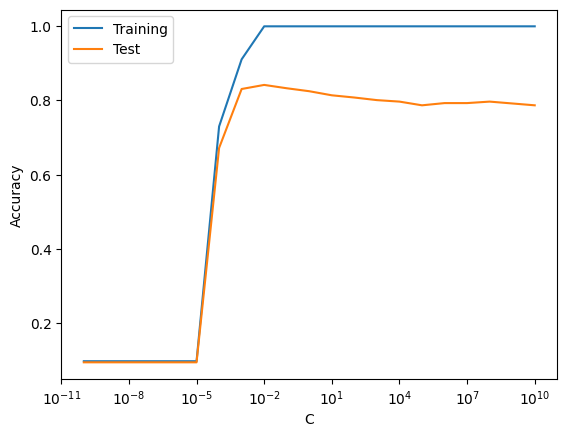

In [11]:
plt.plot(c_param_list, accuracy_train,label='Training')
plt.plot(c_param_list, accuracy_test, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

### 非ゼロ重みの数のグラフ出力

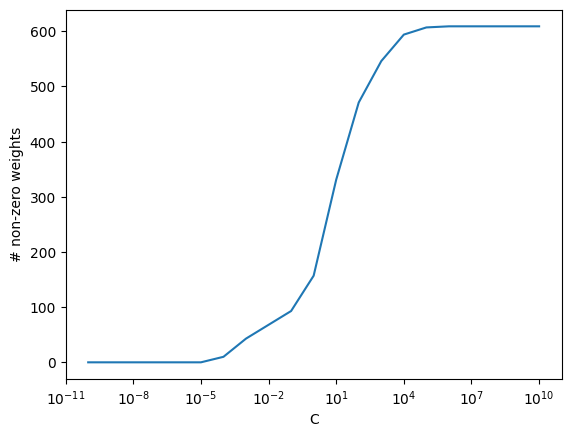

In [12]:
plt.plot(c_param_list, n_nonzero_weights)
plt.ylabel('# non-zero weights')
plt.xlabel('C')
plt.xscale('log')
plt.show()

### 【提出課題】 学習済み重みを2次元にプロット
- いずれかひとつのクラスに対応するロジスティック回帰の重みのみで良い
- 適当な逆正則化パラメータで再度，学習データに適合させてから描画する

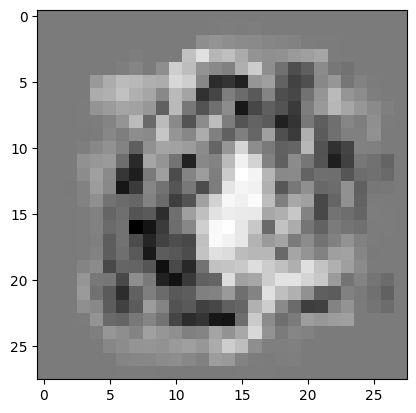

In [13]:
# ロジスティック回帰のインスタンス生成
lr = LogisticRegression(penalty='l2', C=0.01, random_state=0,
                        solver='liblinear', multi_class='ovr')
# 学習データに再適合
lr.fit(X_train, y_train)
# 学習済み重みを2次元に変換
img = lr.coef_[0].reshape(28, 28)

plt.imshow(img, cmap='Greys')
plt.show()